In [48]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

import datetime
import calendar

path_to_data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-sedelkin/analytics_practice/project_ecommerce/data/'

In [3]:
#1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

In [4]:
customers = pd.read_csv(path_to_data + 'olist_customers_dataset.csv')
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [25]:
orders = pd.read_csv(path_to_data + 'olist_orders_dataset.csv')
orders[['order_purchase_timestamp', \
        'order_approved_at', \
        'order_delivered_carrier_date', \
        'order_delivered_customer_date', \
        'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', \
                                                    'order_approved_at', \
                                                    'order_delivered_carrier_date', \
                                                    'order_delivered_customer_date', \
                                                    'order_estimated_delivery_date']].astype(dtype='Datetime64')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [26]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [6]:
# Ответ: Все 99 441 заказа были совершены разными пользователями, соответственно, у нас 99 441 пользователя, которые совершили покупку 1 раз
orders.customer_id.nunique()

99441

In [7]:
customers.customer_id.nunique()

99441

In [8]:
# Если же считать совершением покупки получение доставленного товара – таких пользователей 96 478
orders.query('order_status == "delivered"').customer_id.nunique()

96478

In [9]:
# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

orders['purchase_month'] = orders.order_purchase_timestamp.to_numpy().astype('datetime64[M]')
orders_status_pivot = pd.pivot_table(orders, values='order_id', index='purchase_month', columns='order_status', fill_value=0, aggfunc='count')
non_delivered_mean = orders_status_pivot.drop(columns=['delivered']).mean()

non_delivered_mean

order_status
approved        0.08
canceled       25.00
created         0.20
invoiced       12.56
processing     12.04
shipped        44.28
unavailable    24.36
dtype: float64

In [10]:
# Наиболее распространённый статус не доставленного заказа – отправлен (shipped). Так как средний оценочный срок доставки меньше месяца,  
# из данных можно сделать предположение, что такие заказы отправляются, но по каким-то причинам месяцами не доходят до покупателя. 
# следующие по распространённости причины – отмена (canceled) и недоступность заказа (unavailable). За которыми следуют нахождение заказа в статусе
# выставлен инвойс (invoiced) и обработка (processing)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


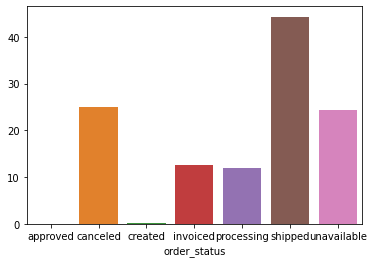

In [11]:
sns.barplot(non_delivered_mean.index, non_delivered_mean.values)

In [12]:
# Средний оценочный срок доставки
mean_delivedy_days = (orders['order_estimated_delivery_date']. \
                      to_numpy().astype('datetime64') - \
                      orders['order_purchase_timestamp']. \
                      to_numpy(). \
                      astype('datetime64') \
                     ) / np.timedelta64(1, 'D')
mean_delivedy_days.mean()

23.767649925118448

In [16]:
order_items = pd.read_csv(path_to_data + 'olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [27]:
# По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)
items_purchase_dates = order_items[['order_id', 'product_id']].merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')

In [28]:
items_purchase_dates.dtypes

order_id                            object
product_id                          object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [90]:
items_purchase_dates['weekday'] = items_purchase_dates.order_purchase_timestamp.apply(datetime.datetime.weekday)
items_purchase_dates[items_purchase_dates.product_id == '368c6c730842d78016ad823897a372db'].weekday.value_counts()

4    67
1    63
3    58
6    54
2    52
0    50
5    44
Name: weekday, dtype: int64

In [107]:
# В датафрейме ниже приведены самые популярные дни недели для покупки каждого из товаров
top_weekdays_by_product = items_purchase_dates. \
    groupby(['product_id', 'weekday']). \
    agg({'order_purchase_timestamp': 'count'}). \
    reset_index(). \
    sort_values(by='order_purchase_timestamp', ascending=False, ignore_index=True). \
    groupby('product_id').head(1). \
    rename(columns={'weekday': 'top_weekday', 
                    'order_purchase_timestamp': 'num_orders'}).re

top_weekdays_by_product

,product_id,top_weekday,num_orders
0,422879e10f46682990de24d770e7f83d,2,93
1,99a4788cb24856965c36a24e339b6058,0,92
2,aca2eb7d00ea1a7b8ebd4e68314663af,3,89
8,53b36df67ebb7c41585e8d54d6772e08,1,76
12,368c6c730842d78016ad823897a372db,4,67
...,...,...,...
61219,6432d844f2be41bb6f2fd279e23415da,4,1
61222,6421ae053bb80dff3ceae1f217f54ed4,0,1
61223,642247ccf62585635cefa1bf09f59b94,1,1
61227,642e125cbc752b4eeb8faf442319c39f,3,1


In [103]:
??pd.DataFrame.sort_values

In [18]:
customers_orders = customers[['customer_id', 'customer_unique_id']].merge(orders, on='customer_id', how='right')

In [19]:
customers_orders

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
